<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Floyd-Steinberg%20sur%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias
Polytechnique Montréal


Exemple de l'application de la méthode Floyd-Steinberg sur une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 422 (delta 57), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (422/422), 35.05 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (211/211), done.
/content/INF8770


In [2]:
import numpy as np
import matplotlib.pyplot as py

Lecture d'une image et affichage 

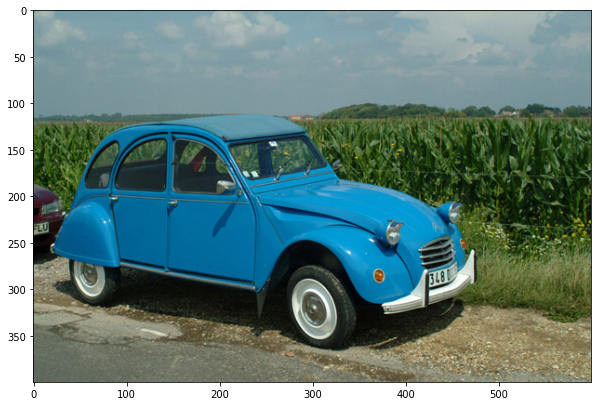

In [3]:
fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('RGB.jpg')
py.imshow(imagelue)
py.show()

Conversion de l'image en float pour les calculs

In [4]:
image=imagelue.astype('float')
erreur = [0.0,0.0,0.0]

Attribution de l'étiquette et calcul de l'erreur

In [5]:
for i in range(len(image)):
    for j in range(len(image[0])):
        #Pour le rouge
        temp=image[i][j][0]
        if (temp-0)<(255-temp):
            image[i][j][0]=0
        else:
            image[i][j][0]=255    
        erreur[0]=temp-image[i][j][0]
        #Pour le vert
        temp=image[i][j][1]
        if (temp-0)<(255-temp):
            image[i][j][1]=0
        else:
            image[i][j][1]=255    
        erreur[1]=temp-image[i][j][1]
        #Pour le bleu
        temp=image[i][j][2]
        if (temp-0)<(255-temp):
            image[i][j][2]=0
        else:
            image[i][j][2]=255    
        erreur[2]=temp-image[i][j][2]
        
        #Diffusion de l'erreur 
        if (j+1)<len(image[0]):
            image[i][j+1][0]=image[i][j+1][0]+0.4375*erreur[0]
            image[i][j+1][1]=image[i][j+1][1]+0.4375*erreur[1]
            image[i][j+1][2]=image[i][j+1][2]+0.4375*erreur[2]
        if (j-1)>=0 and (i+1)<len(image):
            image[i+1][j-1][0]=image[i+1][j-1][0]+0.1875*erreur[0]
            image[i+1][j-1][1]=image[i+1][j-1][1]+0.1875*erreur[1]
            image[i+1][j-1][2]=image[i+1][j-1][2]+0.1875*erreur[2]
        if (i+1)<len(image):
            image[i+1][j][0]=image[i+1][j][0]+0.3125*erreur[0]
            image[i+1][j][1]=image[i+1][j][1]+0.3125*erreur[1]
            image[i+1][j][2]=image[i+1][j][2]+0.3125*erreur[2]
        if (j+1)<len(image[0]) and (i+1)<len(image):
            image[i+1][j+1][0]=image[i+1][j+1][0]+0.0625*erreur[0]
            image[i+1][j+1][1]=image[i+1][j+1][1]+0.0625*erreur[1]
            image[i+1][j+1][2]=image[i+1][j+1][2]+0.0625*erreur[2]


Affichage du résultat final

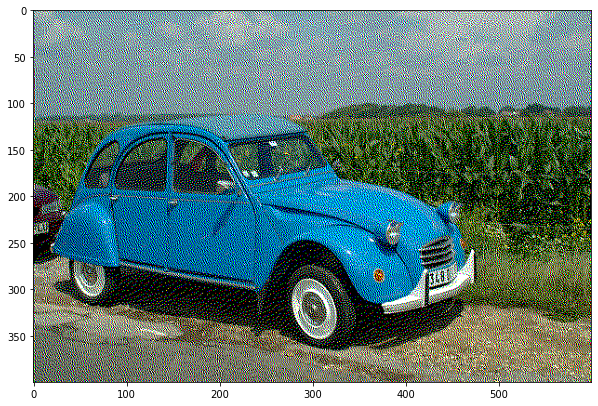

In [6]:
fig2 = py.figure(figsize = (10,10))
imageout=image.astype('uint8')
py.imshow(imageout)
py.show()